## importing module

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.describe

<bound method NDFrame.describe of       Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]>

### find relation btw weight and height

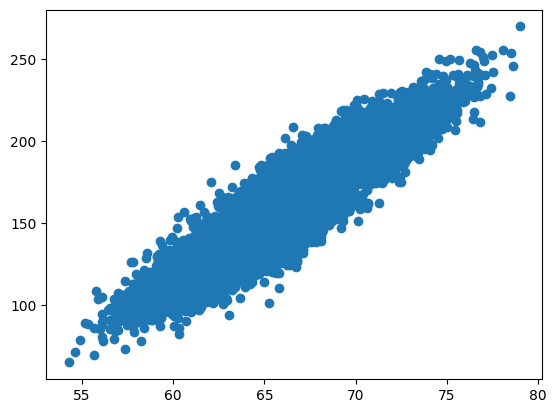

In [5]:
plt.scatter(df['Height'],df['Weight'])

In [6]:
# df.corr()

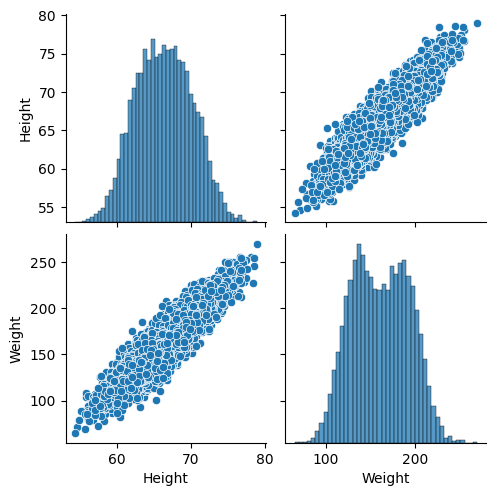

In [7]:
import seaborn as sns
sns.pairplot(df)

### find the dependent and indepandent feature

In [8]:
X = df[['Weight']]   ### indepentend feature should be in data frame or 2d array
y = df['Height']    ## depentend variable can be serice or 1d array


### splite train data and test data 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### standardization.  mean = 0 , SD = 1

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

### here we use only transfrom to prevent data leakage

In [13]:
X_test = sc.transform(X_test)
X_test

array([[ 0.37115893],
       [ 1.05964173],
       [ 0.28064585],
       ...,
       [-1.16697743],
       [ 0.1278561 ],
       [ 0.05862451]], shape=(2500, 1))

### apply linear regression

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(n_jobs=-1)
reg.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [15]:
print("coef is",reg.coef_)
print("intercept is",reg.intercept_)

coef is [3.5520765]
intercept is 66.34834766149207


### show the best fit line

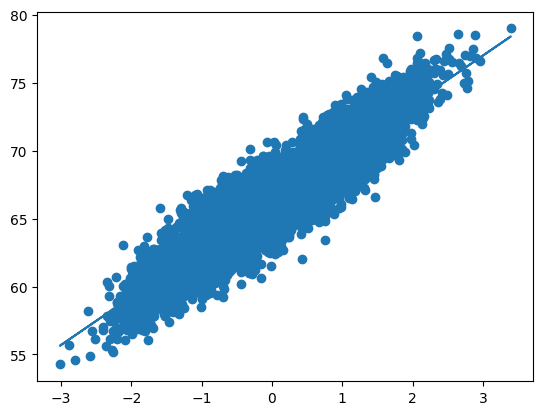

In [16]:
plt.scatter(X_train,y_train)
plt.plot(X_train,reg.predict(X_train))

In [17]:
y_prad = reg.predict(X_test)

### perfromnce matrix

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [19]:
mse = mean_squared_error(y_test,y_prad)
mae = mean_absolute_error(y_test,y_prad)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

2.1245002931280457
1.16186862410503
1.4575665655907608


### find R squre

In [20]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_prad)
score

0.857428881104187

### Find adjusted R squre

In [21]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8573718069973433

In [22]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()


In [23]:
pradict = model.predict(X_test)
pradict

array([ 1.3183849 ,  3.7639285 ,  0.99687554, ..., -4.1451931 ,
        0.45415466,  0.20823876], shape=(2500,))

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              21.48
Date:                Mon, 22 Sep 2025   Prob (F-statistic):                    3.63e-06
Time:                        01:07:00   Log-Likelihood:                         -42106.
No. Observations:                7500   AIC:                                  8.421e+04
Df Residuals:                    7499   BIC:                                  8.422e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.5521      0.766      4.635      0.000       2.050       5.054
==============================================================================
Omnibus:                        3.836   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                3.869
Skew:                          -0.053   Prob(JB):                        0.144
Kurtosis:                       2.968   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
reg.predict(sc.transform(np.array([[182]])))

/Users/apple/AI_ML/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([68.65223748])